In [3]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)


# create a workspace directory
workspace = Path("workspace")
workspace.mkdir(exist_ok=True)
electronics_sales = workspace / "eletronic_sales.xlsx"

In [4]:
# View a snapshot of the data
df = pd.read_excel(electronics_sales)
df.head()

,Date,Branch,Sales Agent,Products,Units,Price
0,2014-09-01,Woji,Chinedu,Apple,2,125.00
1,2015-06-17,Woji,Emeka,Apple,5,125.00
2,2015-09-10,Woji,Ibrahim,Lenovo,7,1.29
3,2015-11-17,Woji,Tolu,HP,11,4.99
4,2015-10-31,Woji,Tonye,Lenovo,14,1.29


In [5]:
## What makes a dirty data?
# Missing values

# Duplicates
# inconsistent data columns
# wrong datatype ....>to change datatypes we use ".astype()" ----> to check datatypes we use "dtypes"
# incomplete data

## Why do we need to clean data? We clean data to ensure
# --->Data integrity, accuracy and consistency---->


## Data anaysis pipeline
#1. ETL (Extract, Transform and Load)
#2. creating data model for visualization
#3. building dashboard
#4. Reporting and presentation

## Data Science pipeline
#1. Preliminary analysis
#2. EDA Exploratory data analysis
#3. Data cleaning
#4. Analysis(Data Wrangling)
#5. Data preprocessing and data mining
#6. Building your model(prediction, forcasting, classification, clustering)
#7. Reporting and visualization
#8. Deployment
#9. Maintenance and monitoring
#10.Support and troubleshooting
#----> Please note that from step2 to step5 is an iterative process that is dependent on step 6. Step 6 itself could also be iterative

In [6]:
# Do a little bit of feature engineering

# add rvenue column
# To create a new column, you start with creating the new columns as a variable name
# and then assign it to the dataframe with the new column name in square brackets

df["Revenue(NGN)"] = round(df["Units"]*df["Price"] * 1000,2)

**Feature Engineering**
* Explanation:

Feature Engineering - This means 3 things, one is useful here and the other two for ML. Feature engineering in this context has to do with creating a new feature or column by combining, extracting or simply doing calculation on an existing column or fature.

In [7]:
# View to see if the changes has been effected
df.head()

,Date,Branch,Sales Agent,Products,Units,Price,Revenue(NGN)
0,2014-09-01,Woji,Chinedu,Apple,2,125.00,250000.0
1,2015-06-17,Woji,Emeka,Apple,5,125.00,625000.0
2,2015-09-10,Woji,Ibrahim,Lenovo,7,1.29,9030.0
3,2015-11-17,Woji,Tolu,HP,11,4.99,54890.0
4,2015-10-31,Woji,Tonye,Lenovo,14,1.29,18060.0


In [8]:
# Let's check the datatypes of our columns
df.dtypes

Date            datetime64[ns]
Branch                  object
Sales Agent             object
Products                object
Units                    int64
Price                  float64
Revenue(NGN)           float64
dtype: object

In [9]:
# Lets convert the date column to datetime
# using "pd.to_datetime()" function

#to_datetime() function converts a string or a number to a datetime object
df["Date"] = pd.to_datetime(df["Date"])

In [10]:
# Lets check the datatypes again
df.dtypes

Date            datetime64[ns]
Branch                  object
Sales Agent             object
Products                object
Units                    int64
Price                  float64
Revenue(NGN)           float64
dtype: object

<Axes: xlabel='Data Types', ylabel='Count'>

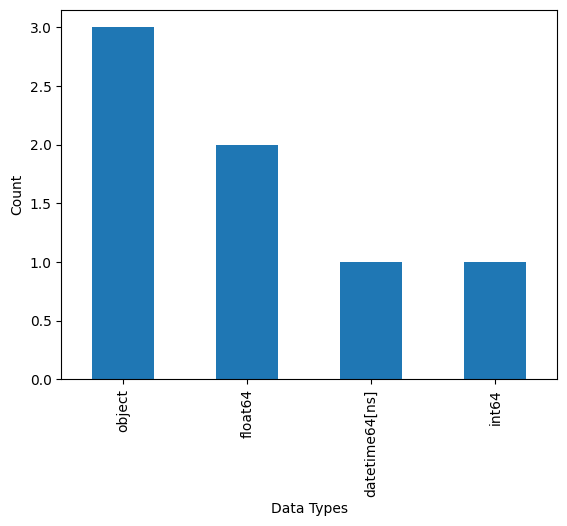

In [11]:
# Lets just plot this to see if it works
df.dtypes.value_counts().plot(kind="bar", xlabel = "Data Types", ylabel = "Count")

In [12]:
# Lets work on our datatime to extract the month, year, and week name
# Using "dt.year", "dt.month_name()", "day_name()"

df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month_name()
df["Week"] = df["Date"].dt.day_name()

In [19]:
df.head()

,Date,Branch,Sales Agent,Products,Units,Price,Revenue(NGN),Year,Month,Week
0,2014-09-01,Woji,Chinedu,Apple,2,125.00,250000.0,2014,September,Monday
1,2015-06-17,Woji,Emeka,Apple,5,125.00,625000.0,2015,June,Wednesday
2,2015-09-10,Woji,Ibrahim,Lenovo,7,1.29,9030.0,2015,September,Thursday
3,2015-11-17,Woji,Tolu,HP,11,4.99,54890.0,2015,November,Tuesday
4,2015-10-31,Woji,Tonye,Lenovo,14,1.29,18060.0,2015,October,Saturday


#2.0 Steps to Analysis
**Note:** This is after you have followed the ETL(Extract Transform Load) frame work, this is you importing your dataset, cleaning and preparing it for analysis

### A. Work on the KPI's (Key performance index of this data)
1. Total units sold
2. Total Revenue
3. Average Revenue per unit
4. Numbers of products
5. Numbers of Sales Agents

### B. Work on the insights by creating models(Note that creating models in data analysis is different from building models in machine learning)
1. Total monthly revenue by Year
2. Total revenue by branch
3. Total revenue by products
4. Total revenue by sales agent
5. Total revenue by week
6. Total revenue by month
7. Trends of sales

### C. Build your dash board
1. Add the title of your analysis.
2. Add the business/company
3. Add your KPI's
4. Add Charts with appropriate labelling
5. Add your slicer if you are working with streamlit or excel or PowerBi or Tableau to make your dashboard interactive(if not, exclude it)

### C. Report your insights
1. Start with the an executive summary briefly explaining what you and briefly introducing the KPI's.
2. Explain your insights in a narative and relatable way using your visuals.

### D. Make recommendation
1. What should the business owner to increase monthly sales
2. Which of the brannches should be given more attention
3. Which products should be removed from the stock, which products should be purchased more
4. Which of the sales agents should be given more incentives/promoted to sales managers position

### A. Working on the PKI's

In [14]:
#1. Total units sold

Total_goods_sold = df["Units"].sum()
print(f"Total goods sold: {Total_goods_sold} units")

Total goods sold: 2121 units


In [15]:
#2. Total Revenue
Total_Revenue = df["Revenue(NGN)"].sum()
print(f"Total Revenue: NGN{Total_Revenue}")

Total Revenue: NGN19627880.0


In [16]:
#3. Average Revenue per unit
## using "round() function to approximate to 2 decimal places"
Average_Revenue_per_unit = round(Total_Revenue / Total_goods_sold,2)
print(f"Average Revenue per unit: NGN{Average_Revenue_per_unit}")

Average Revenue per unit: NGN9254.07


In [17]:
#4. Numbers of products
## Using the .nunique() function to get the number of unique values
Number_of_products = df["Products"].nunique()
print(f"Number of products: {Number_of_products}")

Number of products: 5


In [20]:
#5. Numbers of Sales Agents
Numbers_of_sales_agents = df["Sales Agent"].nunique()
print(f"Numbers of sales agents: {Numbers_of_sales_agents}")

Numbers of sales agents: 11


**B. Work on the insights by creating models and plotting their charts.**

In [21]:
# Set index using the date column
df.set_index("Date", inplace=True)

Task: Calculate the Total Monthly revenue for year 2015 and plot the chart using 3 visualization packages in python

In [22]:
df.Year.unique()

array([2014, 2015], dtype=int32)

In [23]:
sales_2015 = df[df["Year"] == 2015]

In [39]:
#1. Filtering
#2. Grouping
#3. Visuals

# lets start analysing this dataset for insights





# 1. Monthly revenue in 2015

# step1: Filter for 2015

sales_2015 = df[df["Year"] == 2015]
sales_2015.head(25)

,Branch,Sales Agent,Products,Units,Price,Revenue(NGN),Year,Month,Week
Date,,,,,,,,,
2015-06-17,Woji,Emeka,Apple,5,125.00,625000.0,2015,June,Wednesday
2015-09-10,Woji,Ibrahim,Lenovo,7,1.29,9030.0,2015,September,Thursday
2015-11-17,Woji,Tolu,HP,11,4.99,54890.0,2015,November,Tuesday
2015-10-31,Woji,Tonye,Lenovo,14,1.29,18060.0,2015,October,Saturday
2015-12-21,Woji,Tonye,HP,28,4.99,139720.0,2015,December,Monday
2015-08-07,Woji,Emeka,Dell,42,23.95,1005900.0,2015,August,Friday
2015-01-15,Woji,Ibrahim,HP,46,8.99,413540.0,2015,January,Thursday
2015-03-24,Woji,Tolu,Dell,50,4.99,249500.0,2015,March,Tuesday
2015-05-14,Woji,Ibrahim,Lenovo,53,1.29,68370.0,2015,May,Thursday


In [41]:
# Step2:
# I am using the .sort_index() to arrange the output, so the arrangement is done on the index
Total_monthly_revenue_2015 = sales_2015.groupby("Month")["Revenue(NGN)"].sum().sort_index()
Total_monthly_revenue_2015

Month
April         610380.0
August       1830900.0
December     2018780.0
February     1324960.0
January       413540.0
July          996330.0
June          625000.0
March         389430.0
May           787570.0
November       54890.0
October      1157490.0
September     160270.0
Name: Revenue(NGN), dtype: float64

In [42]:
# I am using the .sort_values() to arrange the output, so the arrangement is done base on the values

Total_monthly_revenue_sort_2015 = Total_monthly_revenue_2015.sort_values(ascending=True)
Total_monthly_revenue_sort_2015

Month
November       54890.0
September     160270.0
March         389430.0
January       413540.0
April         610380.0
June          625000.0
May           787570.0
July          996330.0
October      1157490.0
February     1324960.0
August       1830900.0
December     2018780.0
Name: Revenue(NGN), dtype: float64

<Axes: xlabel='Month', ylabel='Revenue(NGN)'>

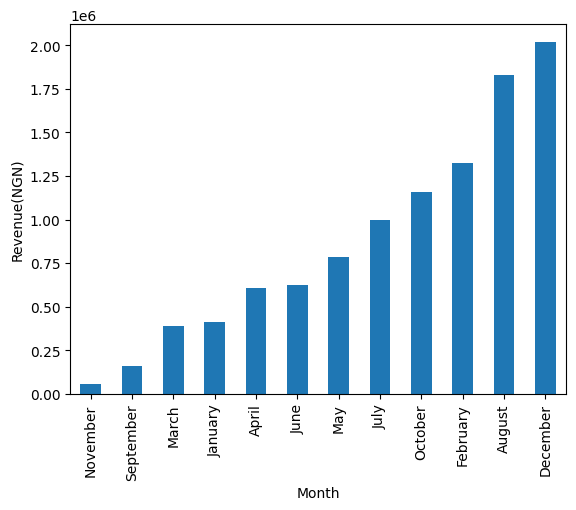

In [43]:
# Lets put this in a plot using pandas
Total_monthly_revenue_sort_2015.plot(kind = "bar", xlabel = "Month", ylabel = "Revenue(NGN)")

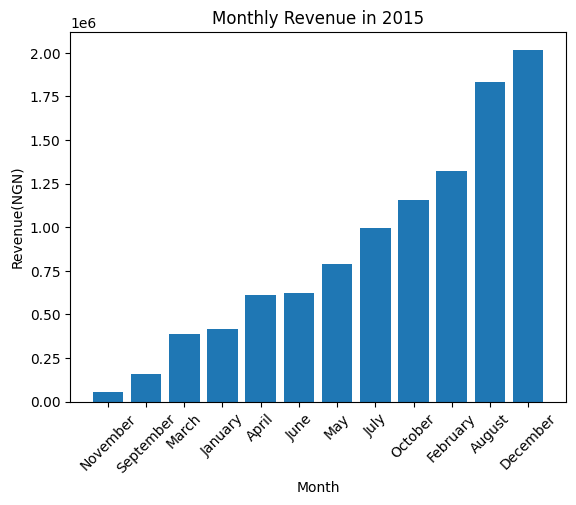

In [44]:
# Lets use matplotlib
plt.bar(Total_monthly_revenue_sort_2015.index, Total_monthly_revenue_sort_2015.values)
plt.xlabel("Month")
plt.ylabel("Revenue(NGN)")
plt.title("Monthly Revenue in 2015")
plt.xticks(rotation = 45)
plt.show()

Student Task1: Follow the same step and calculate the monthly revenue for 2014 and plot that charts using the 3 visualization packages in python.

**Solutions**

In [31]:
sales_2014 = df[df["Year"] == 2014]

In [32]:
#1. Filtering
#2. Grouping
#3. Visuals

# lets start analysing this dataset for insights





# 1. Monthly revenue in 2014

# step1: Filter for 2014

sales_2014 = df[df["Year"] == 2014]
sales_2014.head(10)

,Branch,Sales Agent,Products,Units,Price,Revenue(NGN),Year,Month,Week
Date,,,,,,,,,
2014-09-01,Woji,Chinedu,Apple,2,125.00,250000.0,2014,September,Monday
2014-02-26,Woji,Ibrahim,Compaq,27,19.99,539730.0,2014,February,Wednesday
2014-10-05,Woji,George,HP,28,8.99,251720.0,2014,October,Sunday
2014-02-09,Woji,Tolu,Lenovo,36,4.99,179640.0,2014,February,Sunday
2014-01-23,Woji,Emeka,HP,50,19.99,999500.0,2014,January,Thursday
2014-12-12,Woji,Chinedu,Lenovo,67,1.29,86430.0,2014,December,Friday
2014-04-18,Woji,Tonye,Lenovo,75,1.99,149250.0,2014,April,Friday
2014-05-05,Woji,Tolu,Lenovo,90,4.99,449100.0,2014,May,Monday
2014-06-25,Woji,George,Lenovo,90,4.99,449100.0,2014,June,Wednesday


In [ ]:
# Step2:
# I am using the .sort_index() to arrange the output, so the arrangement is done on the index
Total_monthly_revenue_2014 = sales_2014.groupby("Month")["Revenue(NGN)"].sum().sort_index()
Total_monthly_revenue_2014

Month
April         448650.0
August        174650.0
December     1269690.0
February      719370.0
January      1188550.0
July         1676900.0
June          988500.0
March         167440.0
May           512780.0
November      778890.0
October       827080.0
September     505840.0
Name: Revenue(NGN), dtype: float64

In [34]:
# I am using the .sort_values() to arrange the output, sp the arrangement is done base on the values

Total_monthly_revenue = sales_2014.groupby("Month")["Revenue(NGN)"].sum().sort_values(ascending = False)
Total_Revenue

np.float64(19627880.0)